Import external libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

Define path to cloned repository. Change to suit your path.

In [2]:
path_to_repo = '/Users/berman01/Documents/barrets-segment-length-predictor'

Read in tile count data for BEST2 and BEST3. Change paths to ```barretts-segment-length-predictor``` directory as appropriate.

In [3]:
best2_tff3_tile_data = pd.read_excel(os.path.join(path_to_repo, 'data', 'BEST2_TFF3_AND_GASTRIC_TILE_COUNTS_QC_PASSING.xlsx'))
best2_prague_length_data = pd.read_excel(os.path.join(path_to_repo, 'data', 'BEST2_ENDOSCOPY_CRF_CLEANED_SHORTENED.xlsx'))
best3_tff3_tile_data = pd.read_excel(os.path.join(path_to_repo, 'data', 'BEST3_TFF3_AND_GASTRIC_TILE_COUNTS_QC_PASSING.xlsx'))
best3_prague_length_data = pd.read_csv(os.path.join(path_to_repo, 'data', 'BEST3_ENDOSCOPY_CRF_CLEANED.csv'))

Merge data appropriately and exclude columns not necessary for plots. Add a ln(TFF3 positive tile count + 1) column.

In [30]:
best2_tff3_prague_data = best2_tff3_tile_data.merge(best2_prague_length_data, left_on='Case', right_on='Case')
best3_tff3_prague_data = best3_tff3_tile_data.merge(best3_prague_length_data, left_on='Case', right_on='Case')

#tff3_prague_data = pd.concat([best2_tff3_prague_data[['Case', 'Gastric_count', 'TFF3_positive_count', 'PRAGUE_C', 'PRAGUE_M']], 
#                              best3_tff3_prague_data[['Case', 'Gastric_count', 'TFF3_positive_count', 'PRAGUE_C', 'PRAGUE_M']]])
tff3_prague_data = best2_tff3_prague_data

tff3_prague_data['ln(TFF3_positive_count + 1)'] = np.log(tff3_prague_data['TFF3_positive_count']+1)
tff3_prague_data['C_gtet_1_or_M_gtet_3'] = ((tff3_prague_data['PRAGUE_C'] >= 1) | (tff3_prague_data['PRAGUE_M'] >= 3))

tff3_prague_data_nozeros = tff3_prague_data[tff3_prague_data['TFF3_positive_count'] != 0]
print(tff3_prague_data_nozeros)

               Case  Gastric_count  Cytosponge QC  TFF3_positive_count  \
0    BEST2_CAM_0001            360              1                   20   
1    BEST2_CAM_0002            678              1                   55   
2    BEST2_CAM_0003             12              1                   17   
3    BEST2_CAM_0005            292              1                   56   
4    BEST2_CAM_0006           1140              1                 1074   
..              ...            ...            ...                  ...   
524  BEST2_WEL_0002           2471              1                   11   
525  BEST2_WEL_0003            590              1                  319   
526  BEST2_WEL_0004           1131              1                   42   
527  BEST2_WEL_0005           1609              1                  255   
528  BEST2_WEL_0007            864              1                    7   

     Endoscopy (at least C1M3)  Endoscopy (at least C1M1)  \
0                            1                    

Create plot 2 subplots.

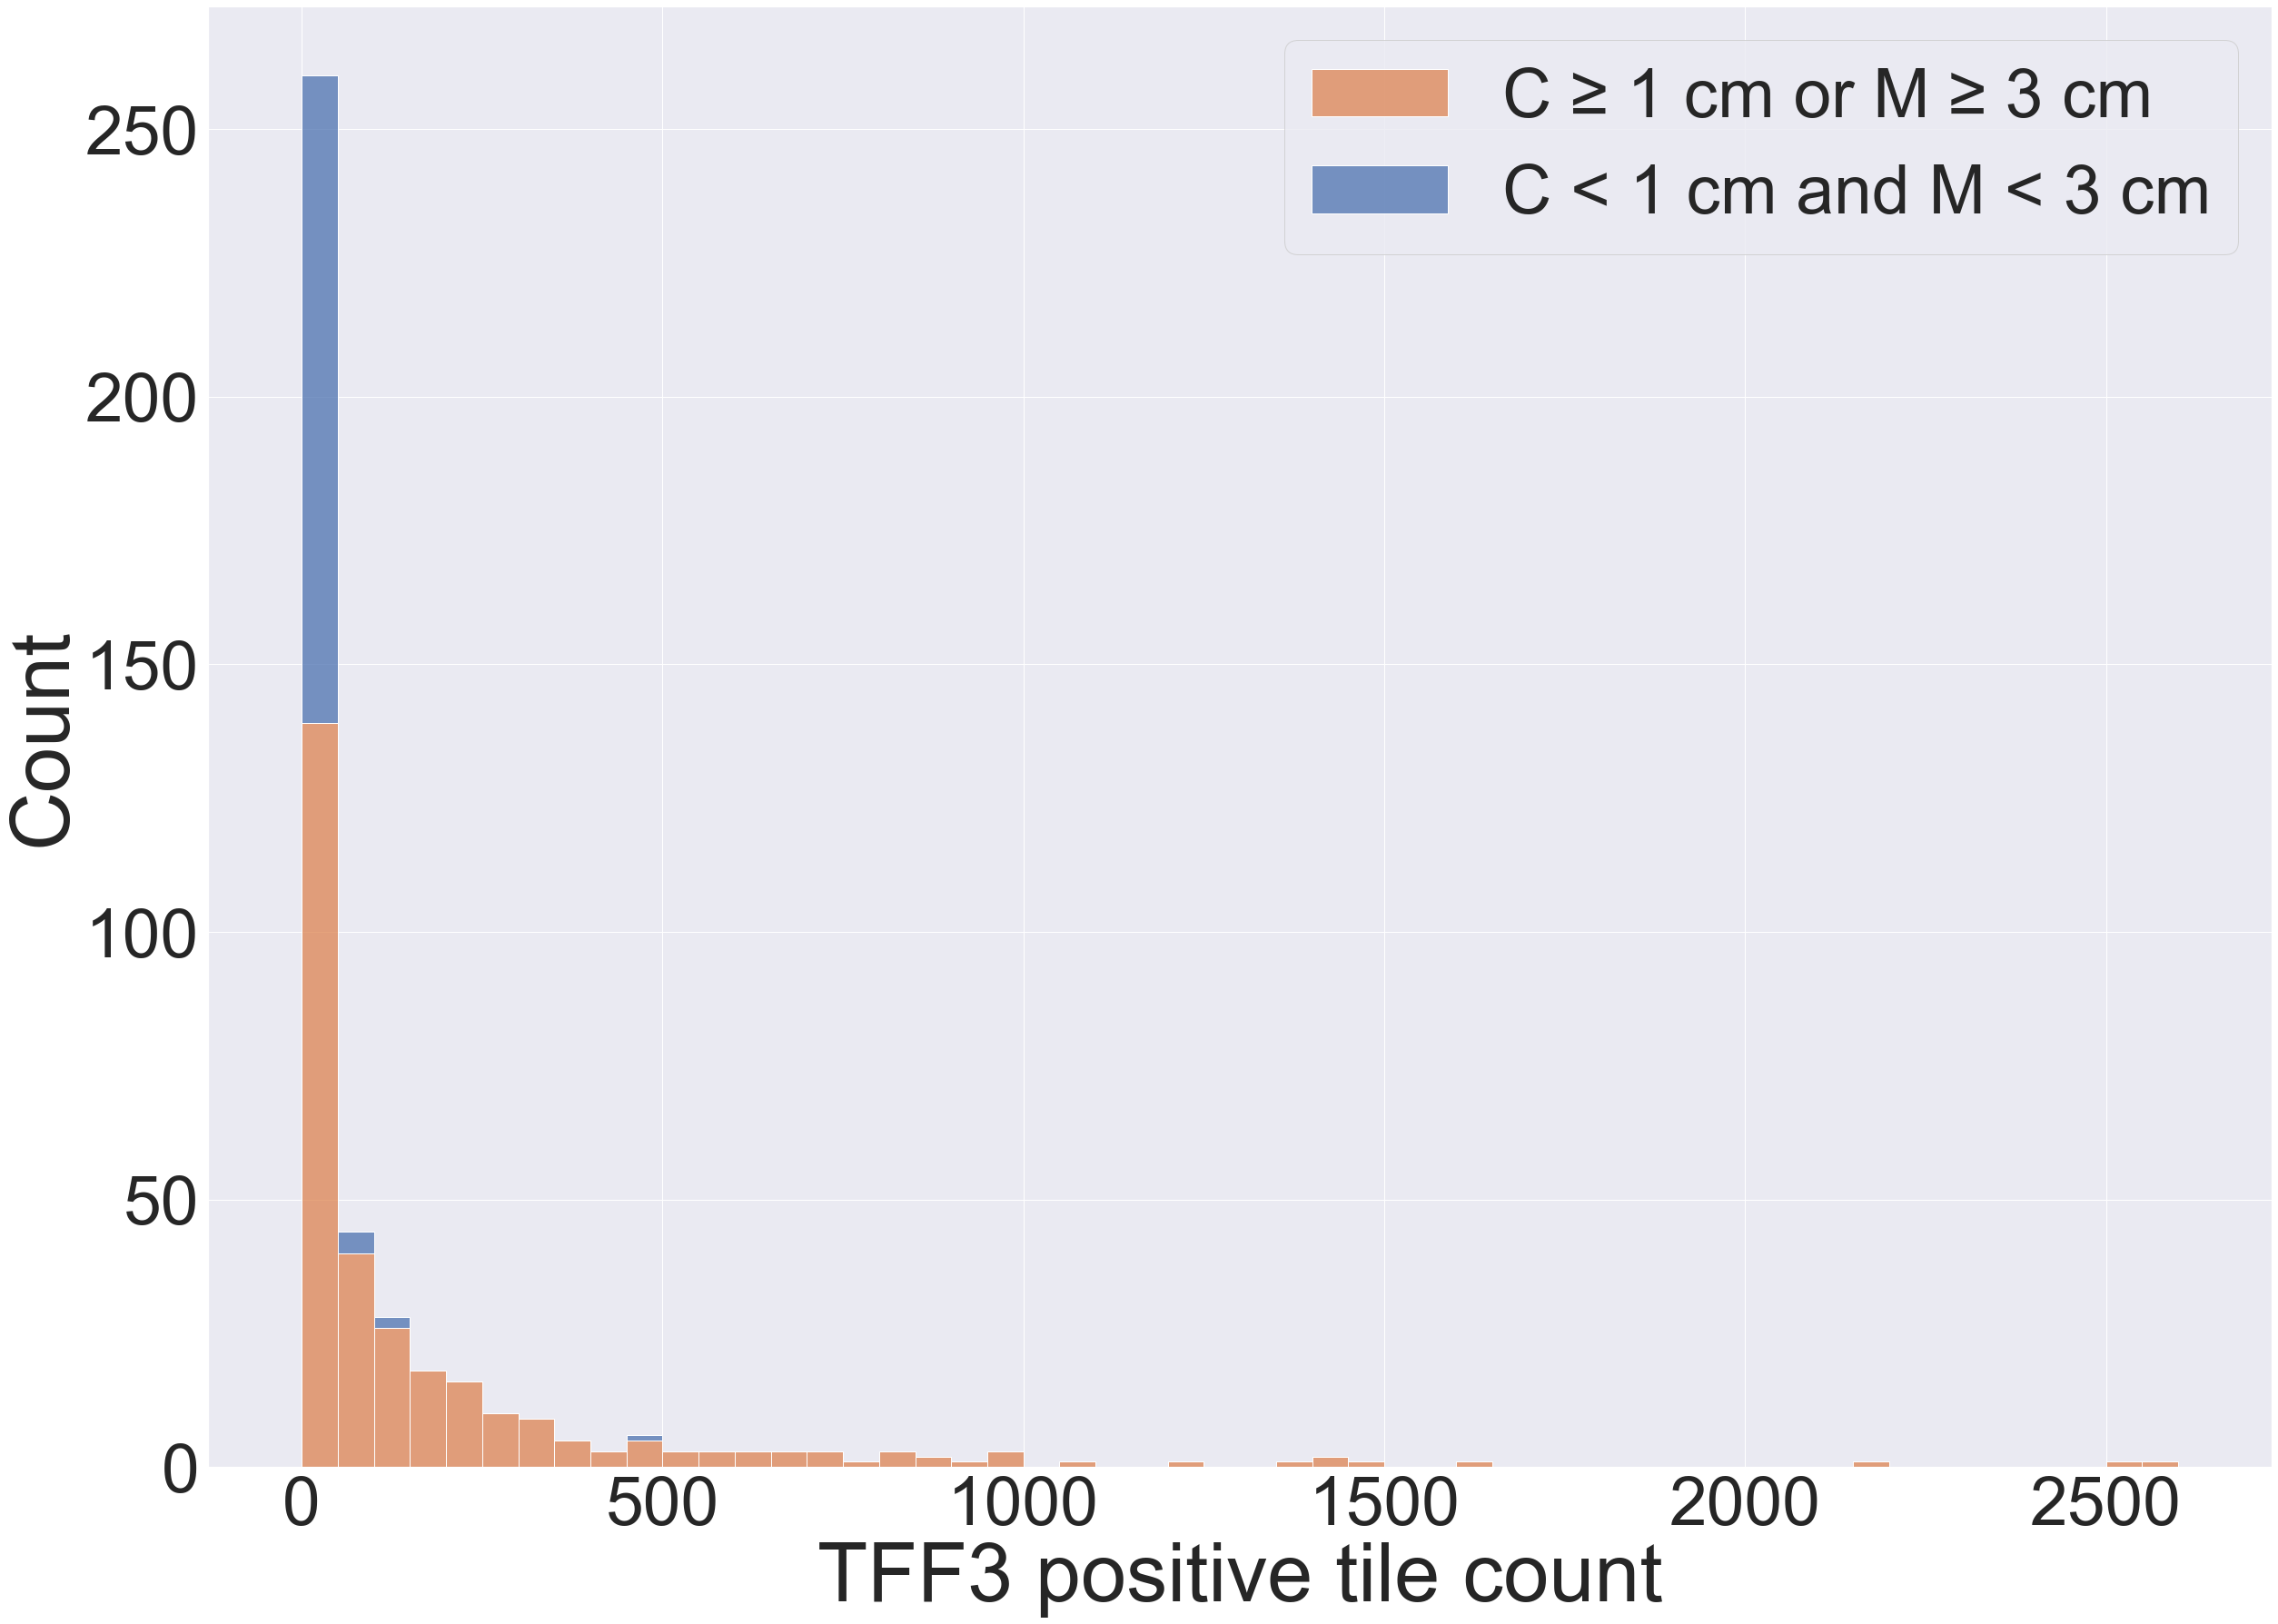

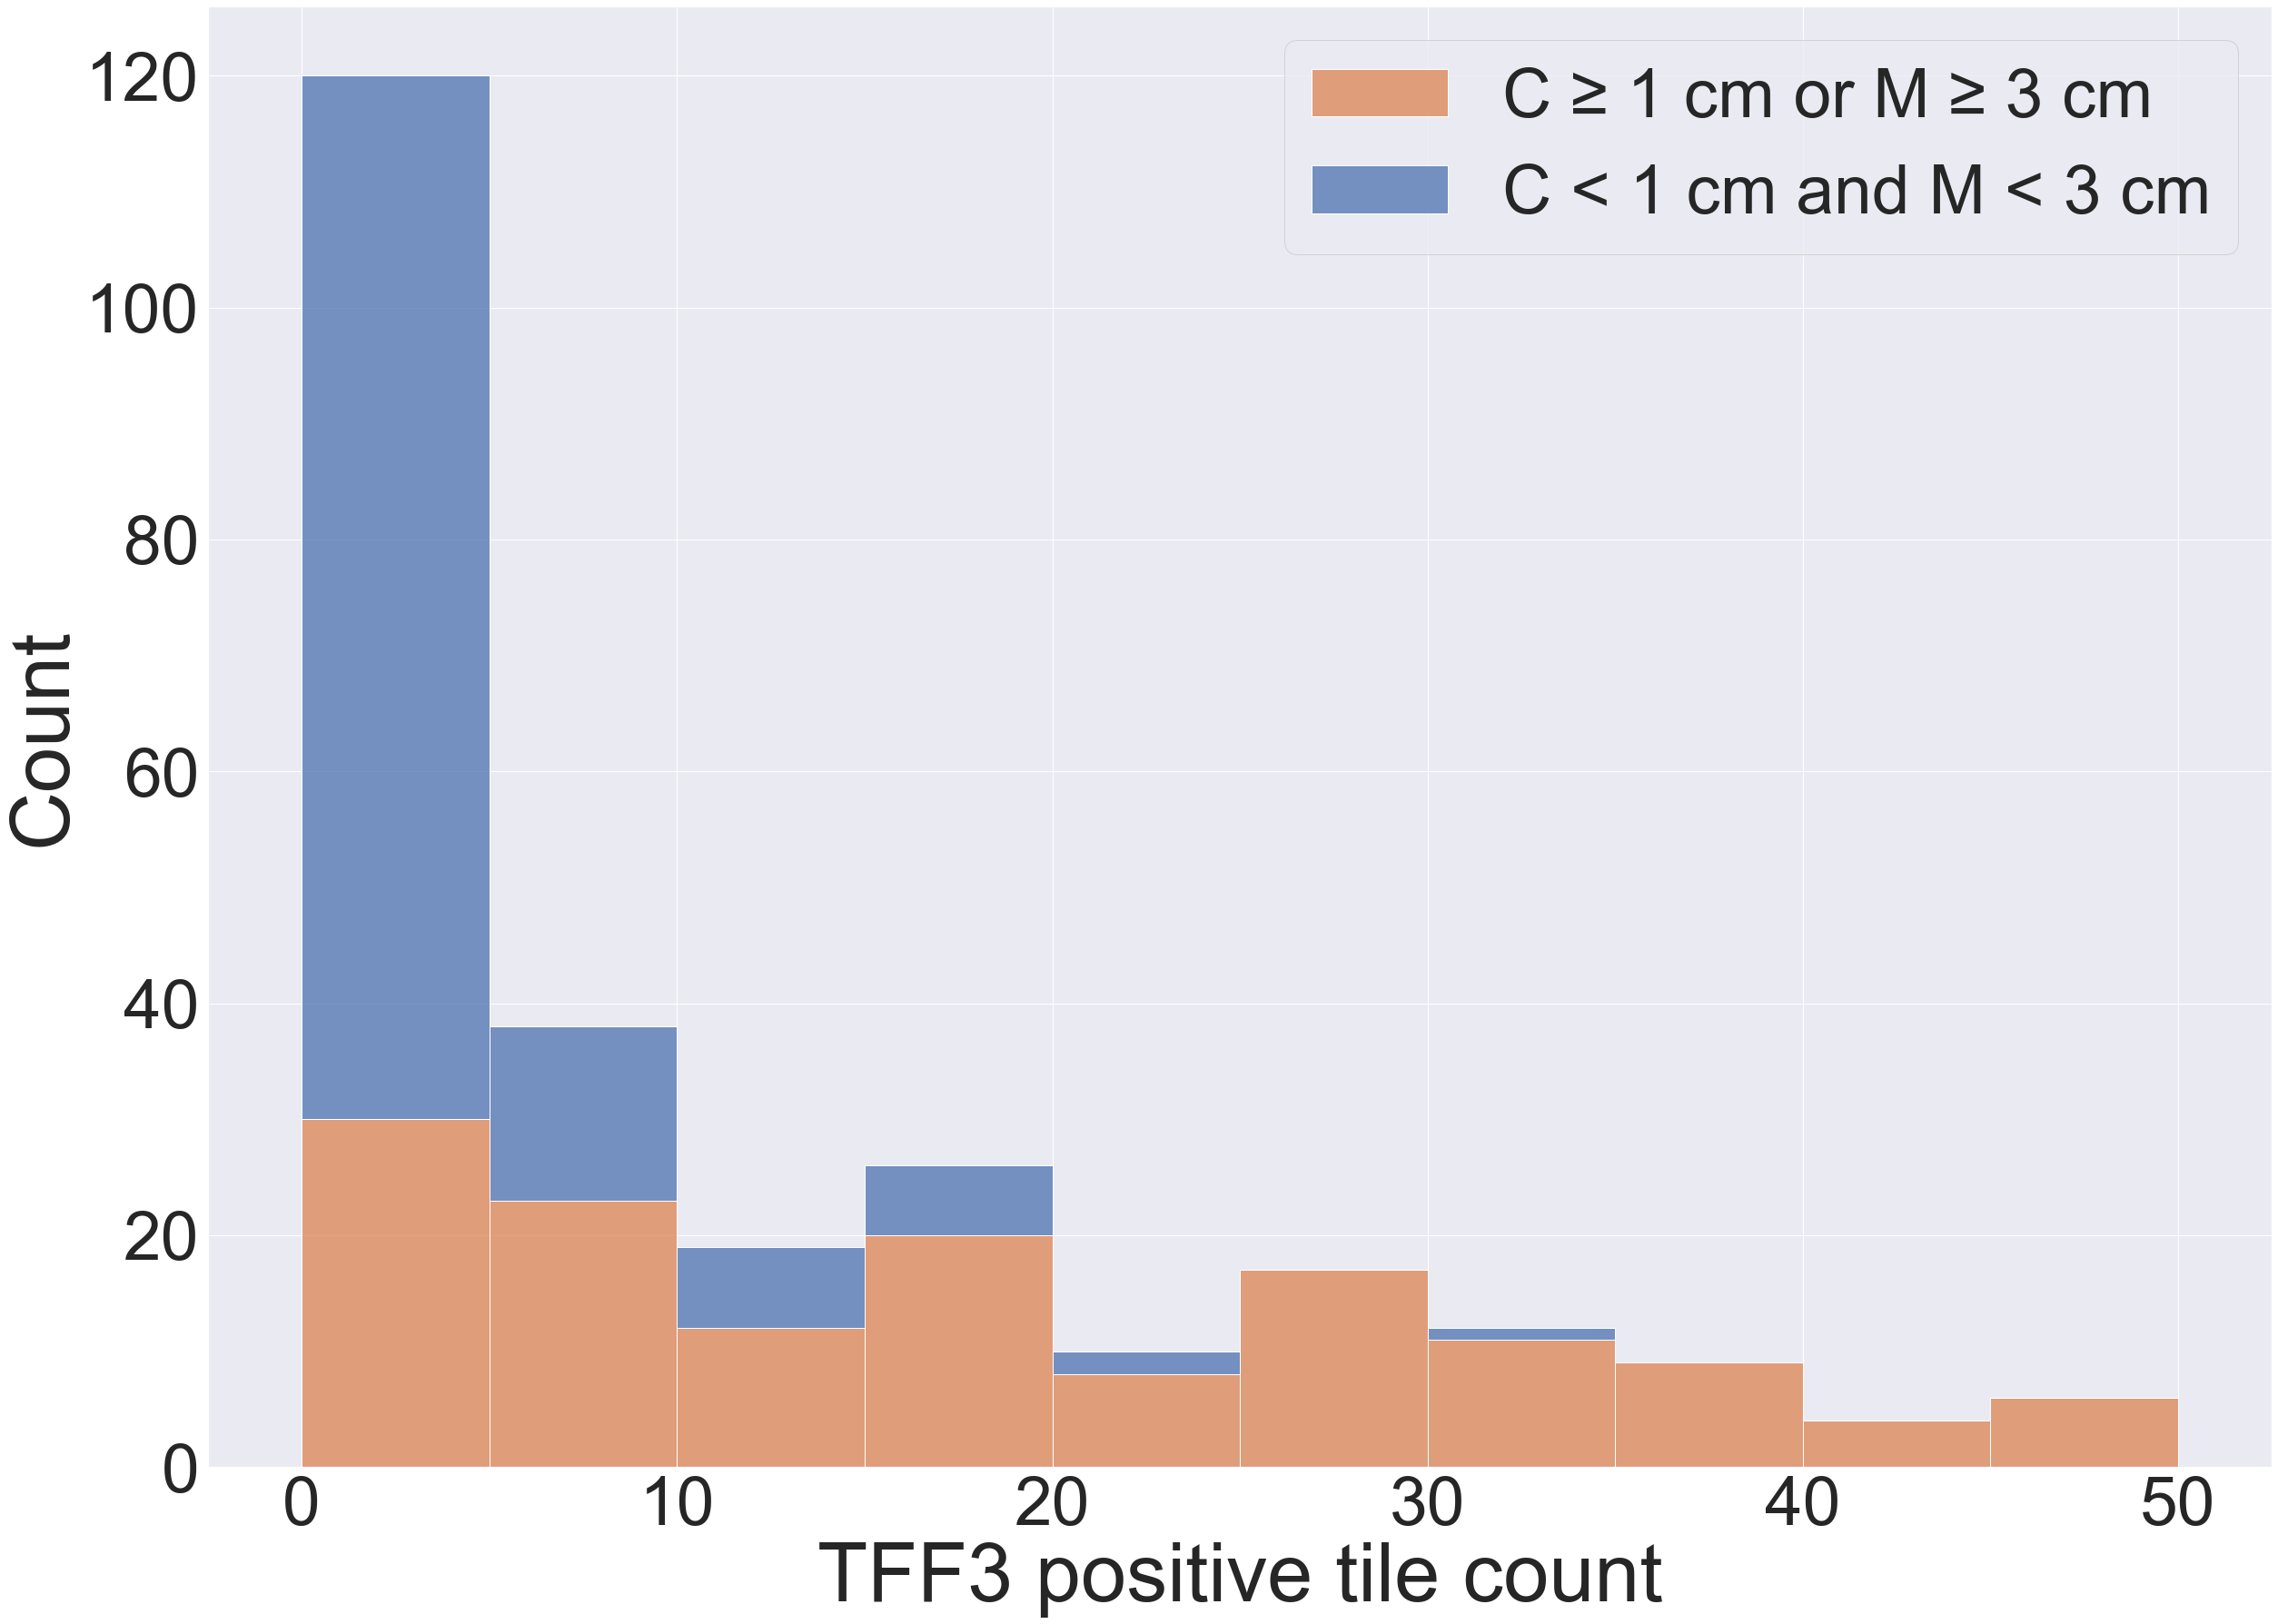

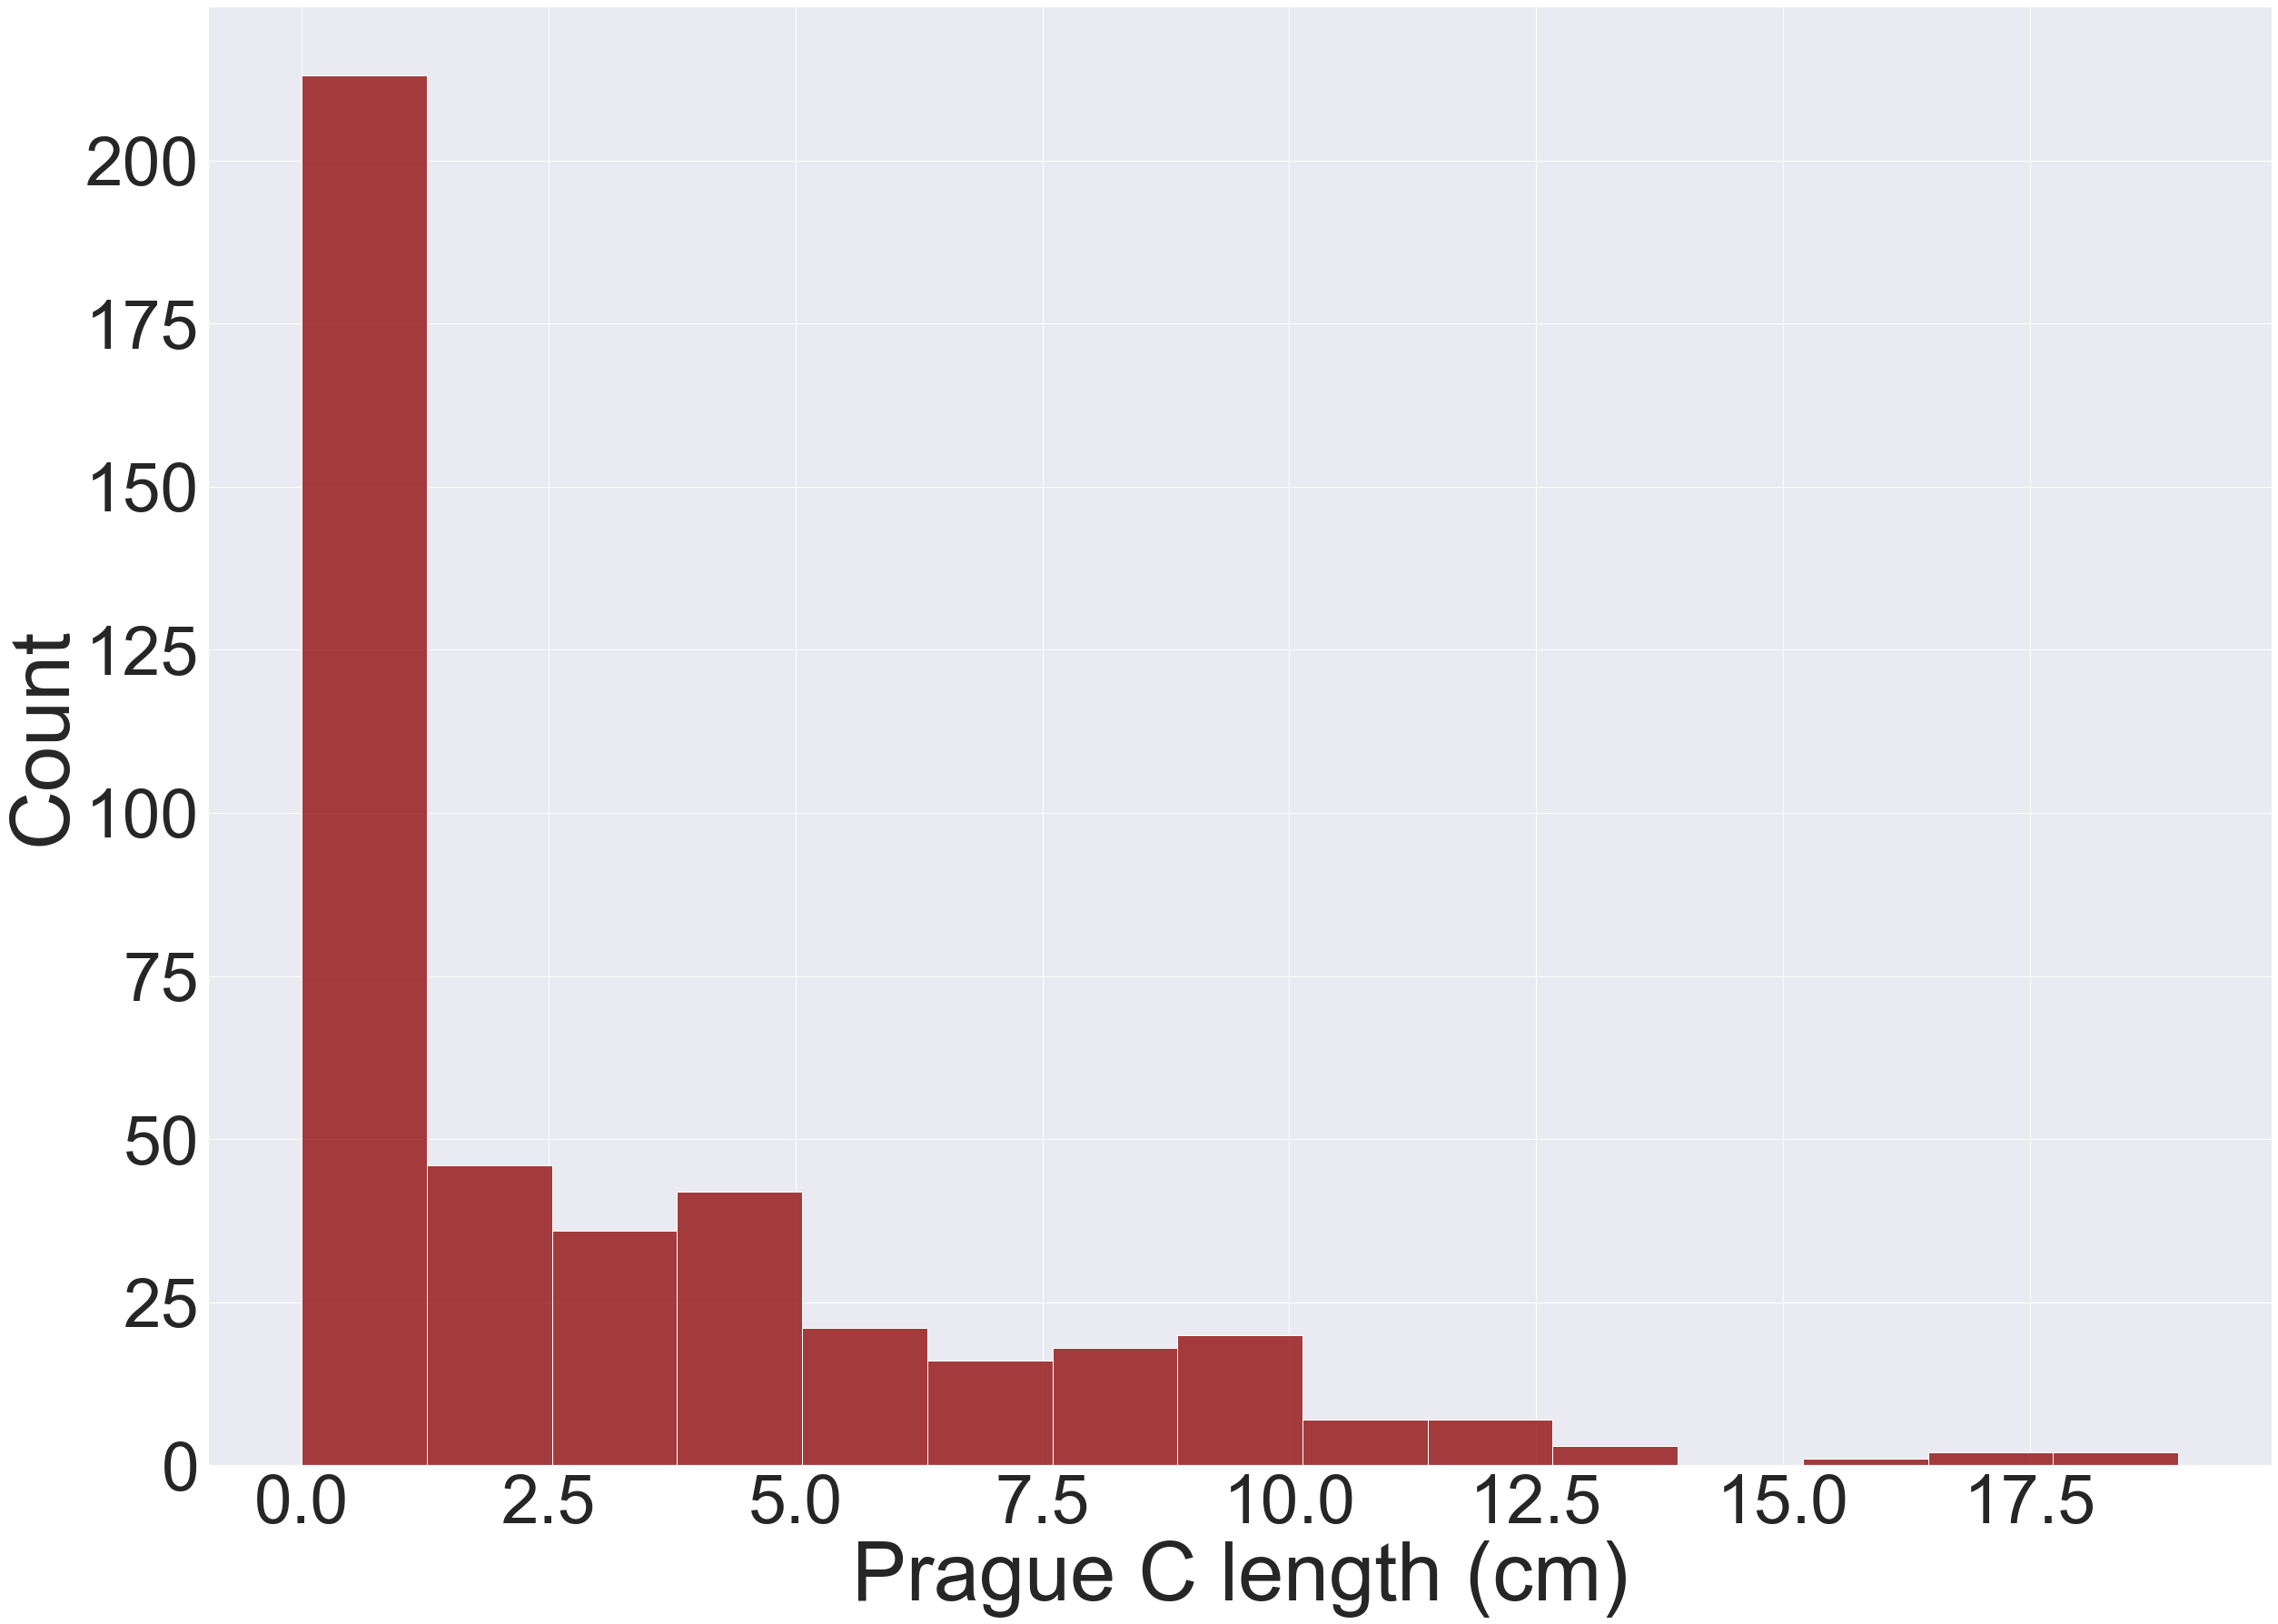

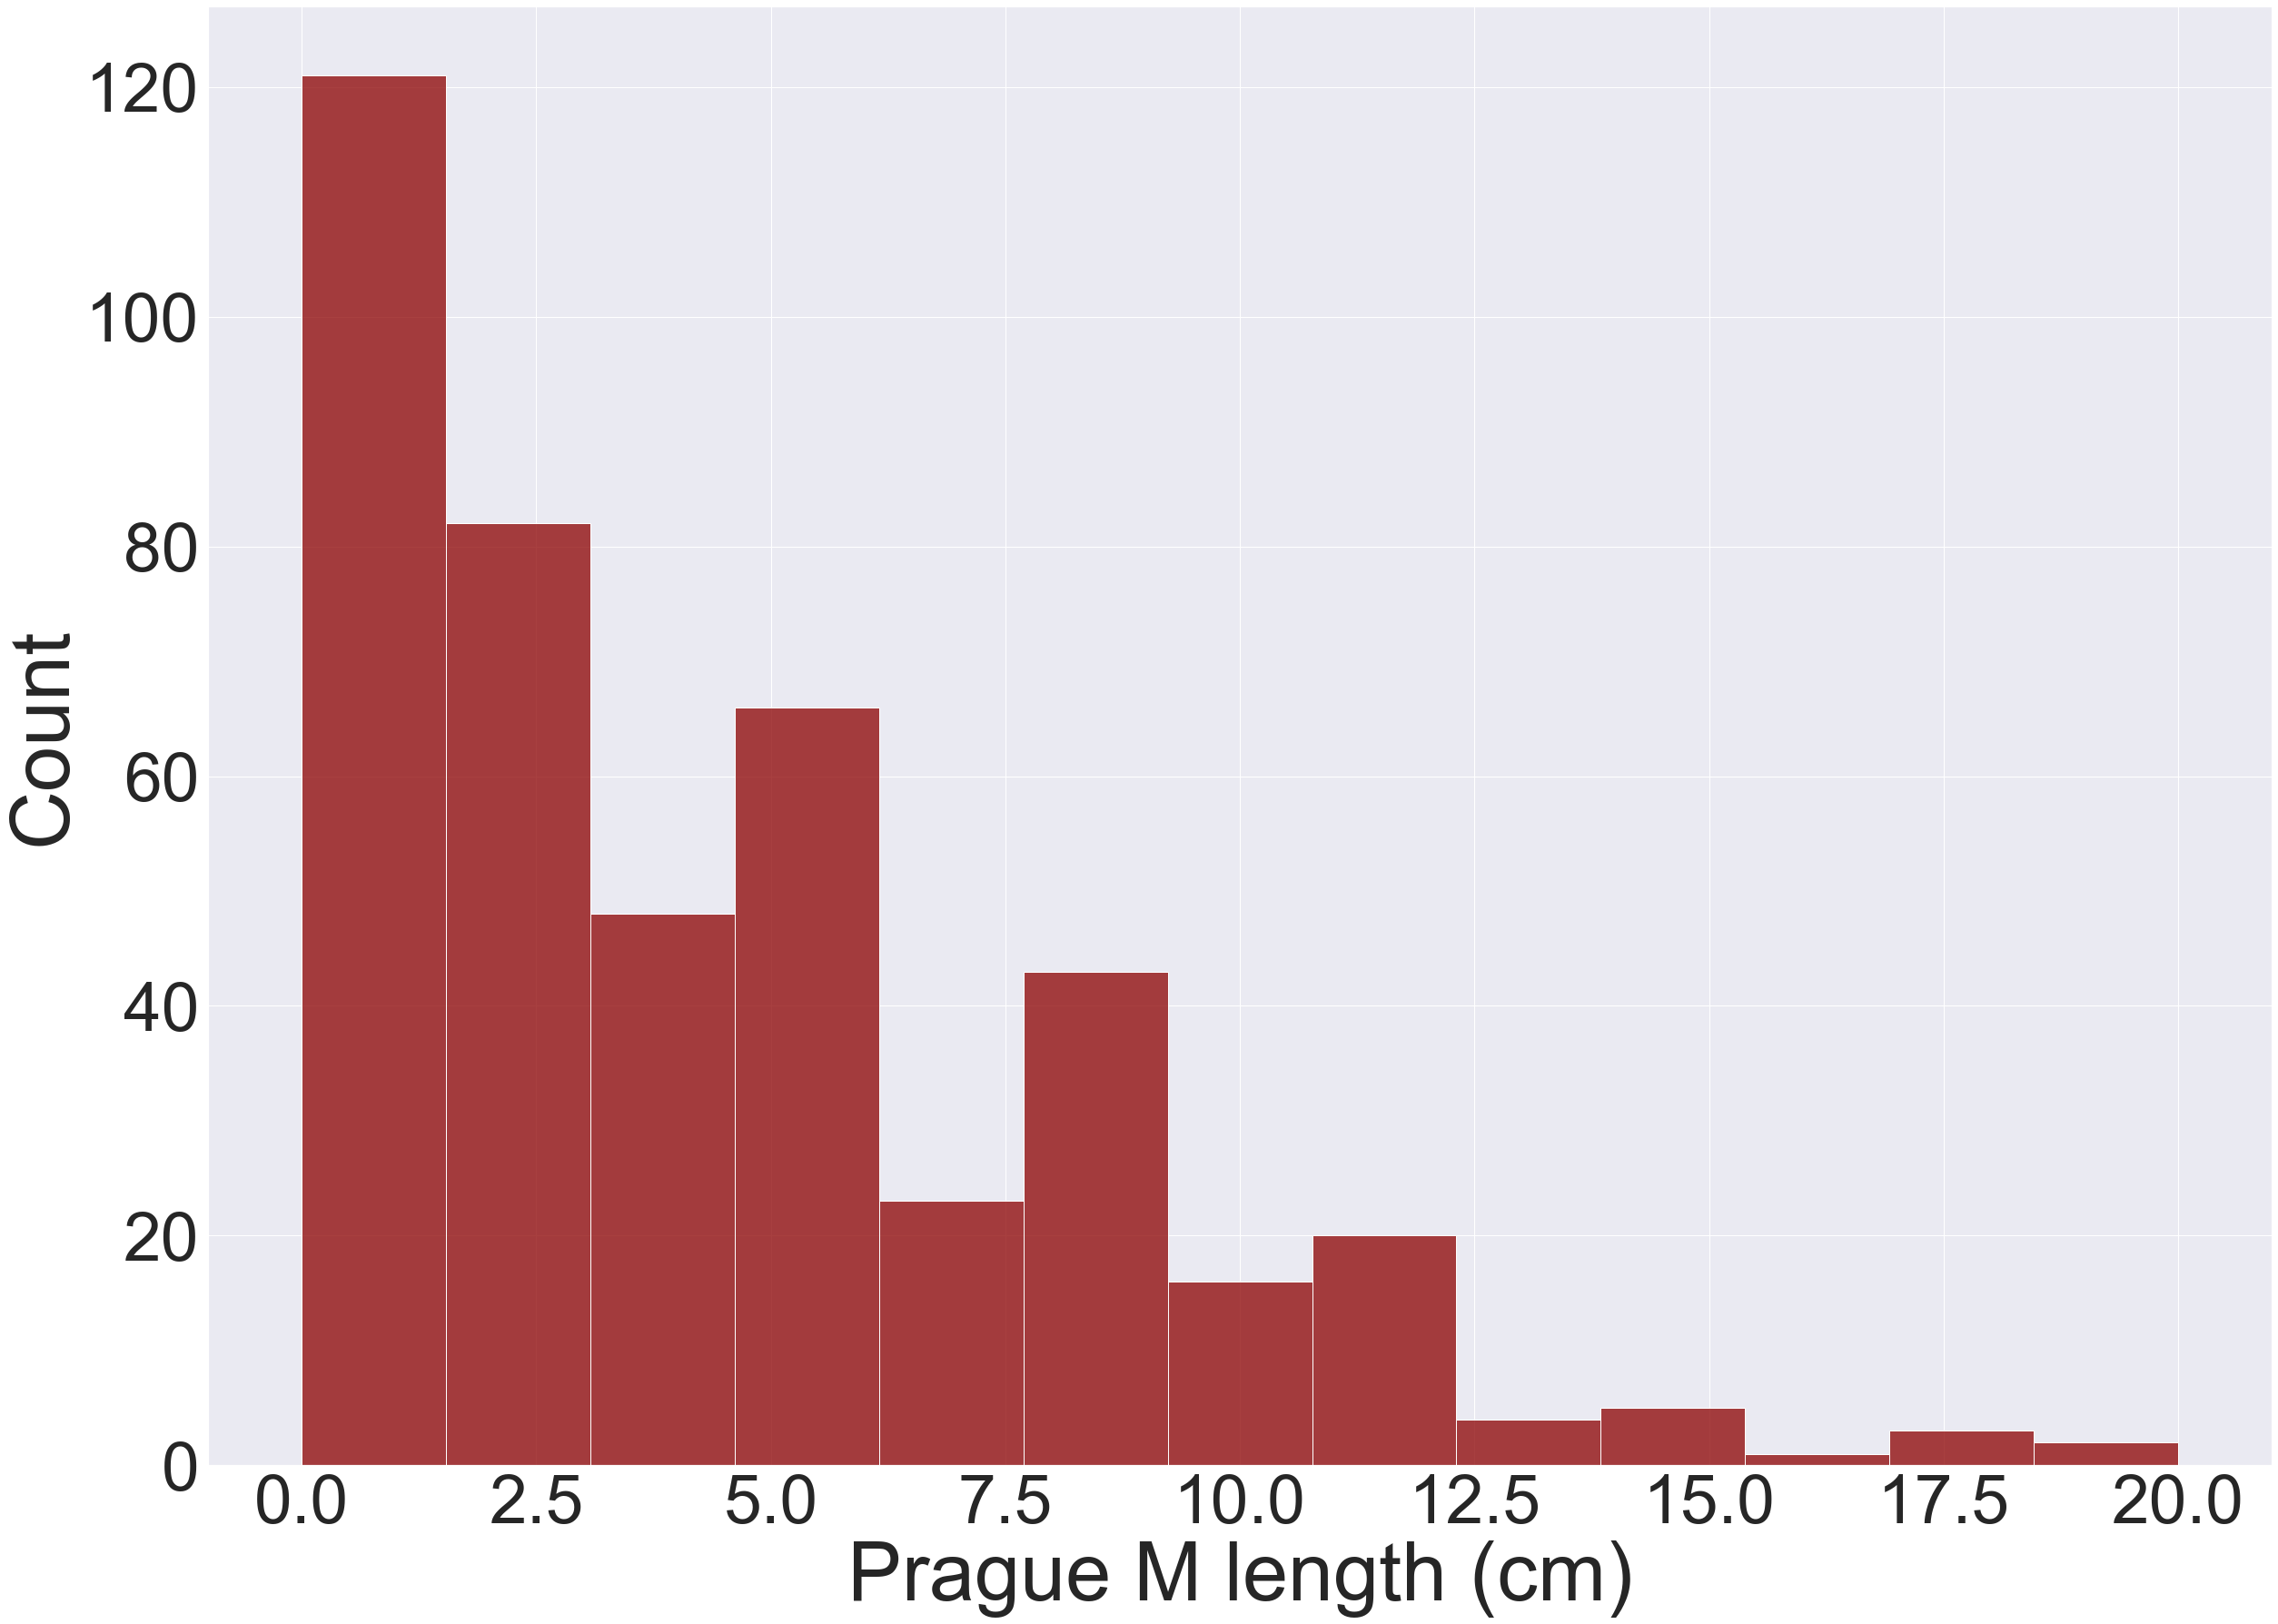

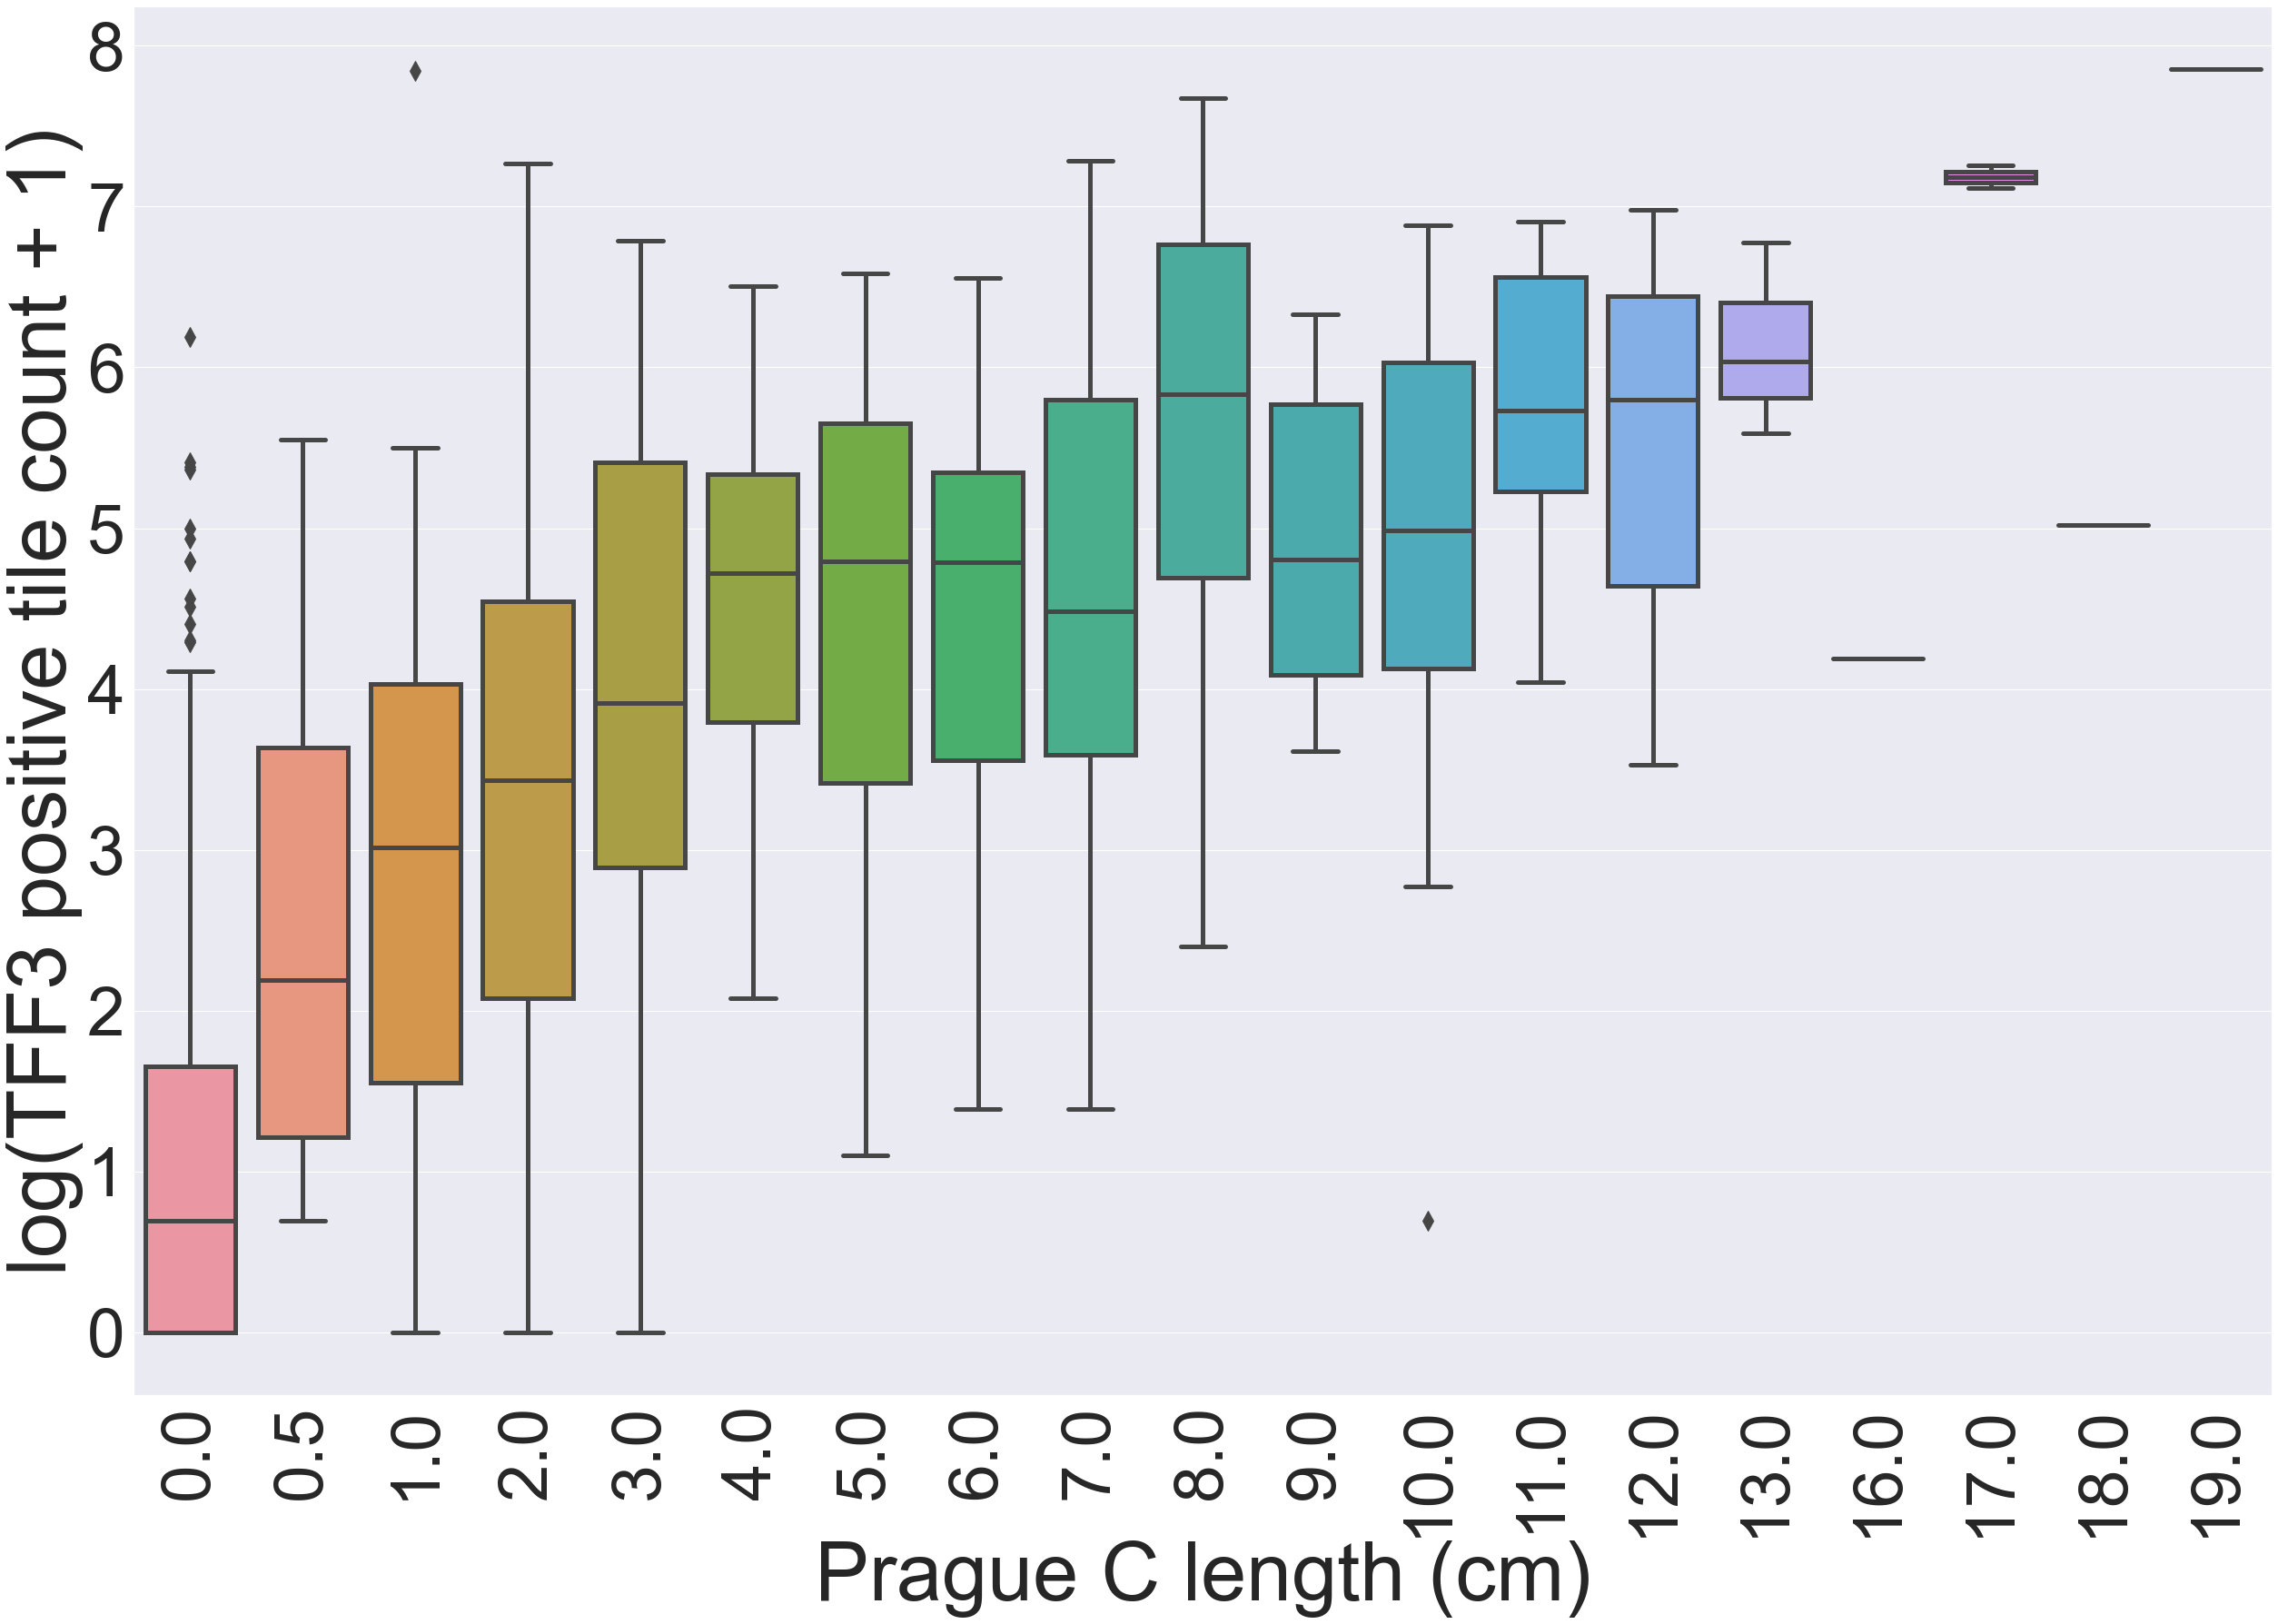

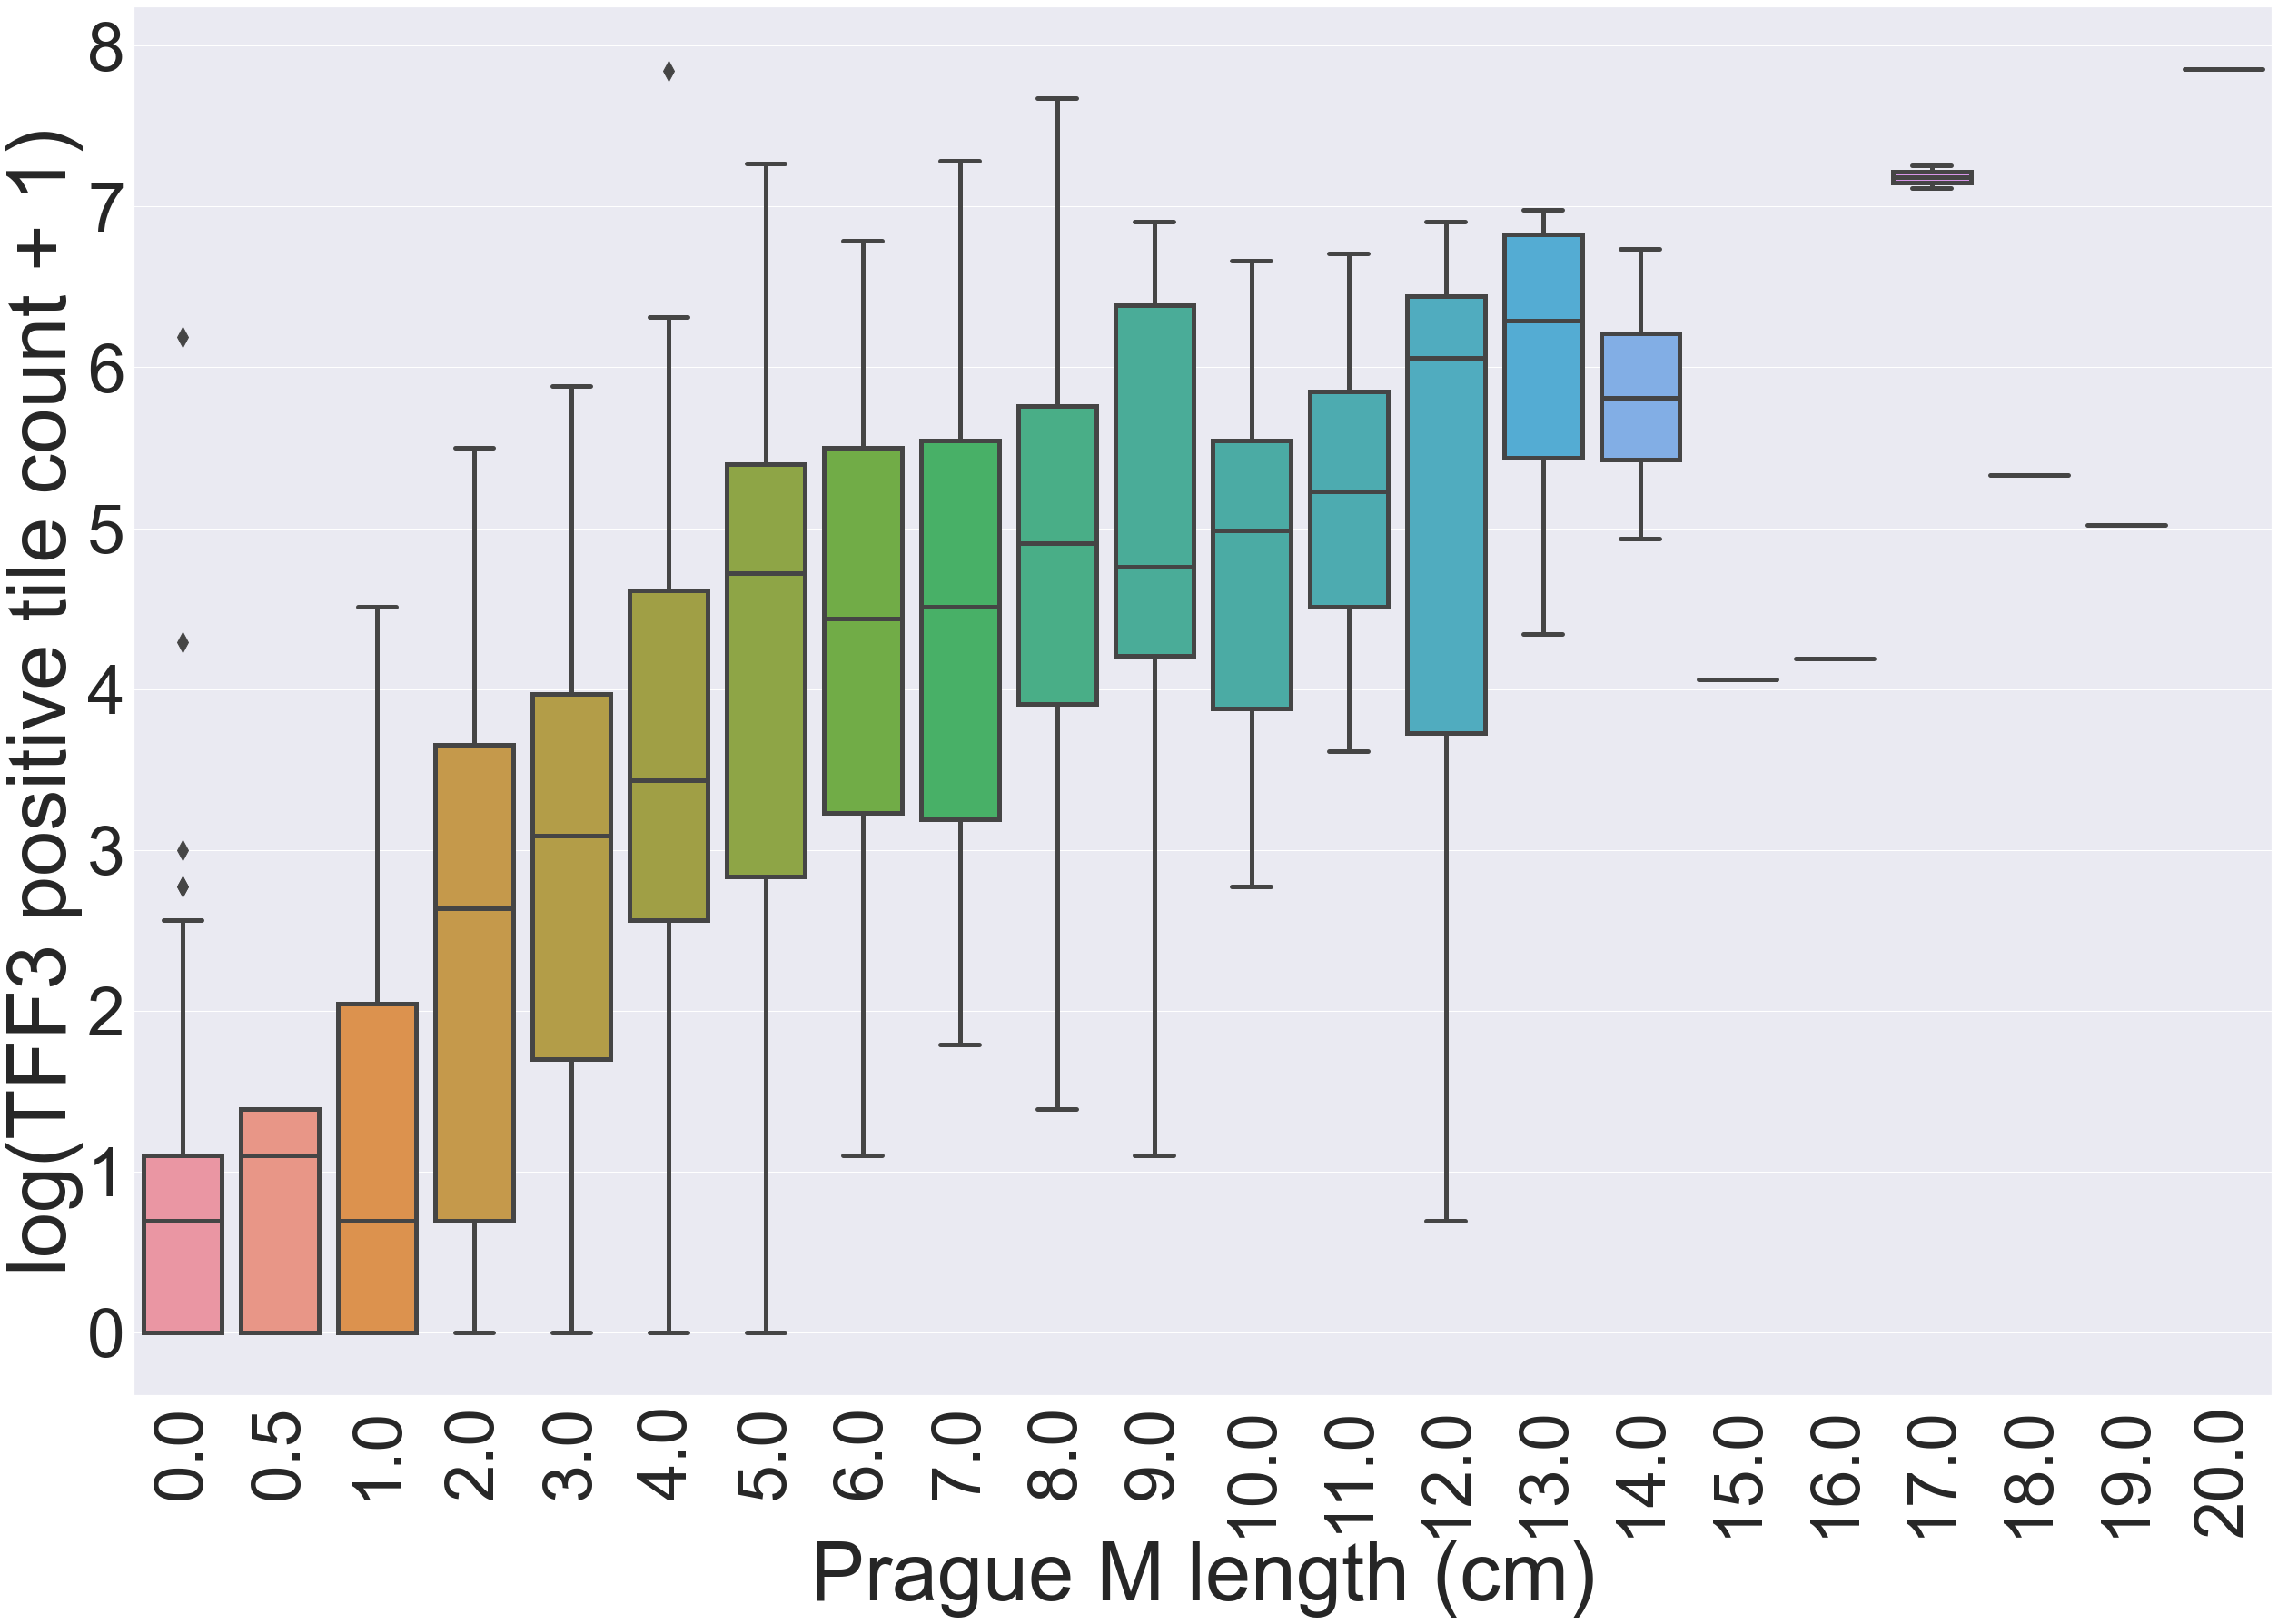

In [75]:
font_size = 90 #23
label_size = 75 #15

plt.rc('ytick', labelsize=label_size)
plt.rc('xtick', labelsize=label_size)

plt.rcParams["figure.figsize"] = (35,25)

#sns.set(style='darkgrid')

# Plot 2a
ax = sns.histplot(data=tff3_prague_data_nozeros, x='TFF3_positive_count', hue='C_gtet_1_or_M_gtet_3', multiple='stack', bins=[k*50 for k in list(range(53))])
ax.set_xlabel('TFF3 positive tile count', fontsize=font_size)
ax.set_ylabel('Count', fontsize=font_size)
#plt.setp(ax.get_legend().get_texts(), fontsize=label_size)
#plt.setp(ax.get_legend().get_title(), fontsize=label_size)
plt.legend(labels=['C ≥ 1 cm or M ≥ 3 cm', 'C < 1 cm and M < 3 cm'], fontsize=label_size)
plt.tight_layout()
plt.savefig(os.path.join(path_to_repo, 'figures', 'fig2a.svg'))
plt.show()

# Plot 2b
##[0,5,10,15,20,25,30,35,40,45,50]
#ax = sns.histplot(data=tff3_prague_data, x='TFF3_positive_count', bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#ax.set_xlabel('TFF3 positive tile count', fontsize=font_size)
#ax.set_ylabel('Count', fontsize=font_size)
#plt.tight_layout()
#plt.savefig(os.path.join(path_to_repo, 'figures', 'fig2b.svg'))
#plt.show()

# Plot 2b
##[0,5,10,15,20,25,30,35,40,45,50]
ax = sns.histplot(data=tff3_prague_data_nozeros, x='TFF3_positive_count', hue='C_gtet_1_or_M_gtet_3', multiple='stack', bins=[0,5,10,15,20,25,30,35,40,45,50])
ax.set_xlabel('TFF3 positive tile count', fontsize=font_size)
ax.set_ylabel('Count', fontsize=font_size)
#plt.setp(ax.get_legend().get_texts(), fontsize=label_size)
#plt.setp(ax.get_legend().get_title(), fontsize=label_size)
plt.legend(labels=['C ≥ 1 cm or M ≥ 3 cm', 'C < 1 cm and M < 3 cm'], fontsize=label_size)
plt.tight_layout()
plt.savefig(os.path.join(path_to_repo, 'figures', 'fig2b.svg'))
plt.show()

# Plot 2c
ax = sns.histplot(data=tff3_prague_data_nozeros, x='PRAGUE_C', color='darkred')
ax.set_xlabel('Prague C length (cm)', fontsize=font_size)
ax.set_ylabel('Count', fontsize=font_size)
#ax.set_xlim([-1,21])
#ax.set_ylim([0,400])
plt.tight_layout()
plt.savefig(os.path.join(path_to_repo, 'figures', 'fig2c.svg'))
plt.show()

# Plot 2d
ax = sns.histplot(data=tff3_prague_data_nozeros, x='PRAGUE_M', color='darkred')
ax.set_xlabel('Prague M length (cm)', fontsize=font_size)
ax.set_ylabel('Count', fontsize=font_size)
plt.tight_layout()
plt.savefig(os.path.join(path_to_repo, 'figures', 'fig2d.svg'))
plt.show()

# Plot 2e
ax = sns.boxplot(data=tff3_prague_data, x='PRAGUE_C', y='ln(TFF3_positive_count + 1)', linewidth=5, fliersize=15)
ax.set_xlabel('Prague C length (cm)', fontsize=font_size)
ax.set_ylabel('log(TFF3 positive tile count + 1)', fontsize=font_size)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(path_to_repo, 'figures', 'fig2e.svg'))
plt.show()

# Plot 2f
ax = sns.boxplot(data=tff3_prague_data, x='PRAGUE_M', y='ln(TFF3_positive_count + 1)', linewidth=5, fliersize=15)
ax.set_xlabel('Prague M length (cm)', fontsize=font_size)
ax.set_ylabel('log(TFF3 positive tile count + 1)', fontsize=font_size)
#ax.set_aspect(aspect=1.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(path_to_repo, 'figures', 'fig2f.svg'))
plt.show()